In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings(action='ignore')

In [16]:
# generate synthetic two-dimensional data
X, y = make_blobs(n_samples = 100, random_state=10)

In [17]:
X.shape

(100, 2)

In [18]:
X[:10]

array([[ -2.32496308,  -6.6999964 ],
       [  0.51856831,  -4.90086804],
       [  2.44301805,   3.84652646],
       [  5.82662285,  -9.92259335],
       [  2.03300209,   5.28990817],
       [  3.37979515,   4.18880872],
       [  6.04774884, -10.30504657],
       [ -0.42084194,  -4.24889336],
       [  3.78067293,   5.22062163],
       [  5.69248303,  -7.19999368]])

In [19]:
y.shape

(100,)

In [20]:
y[:10]

array([2, 2, 1, 0, 1, 1, 0, 2, 1, 0])

Text(0, 0.5, 'Feature2')

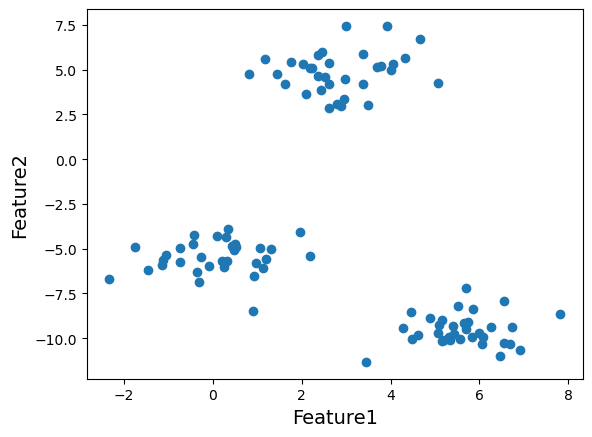

In [21]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Feature1', fontsize=14)
plt.ylabel('Feature2', fontsize=14)

In [39]:
kmeans = KMeans(n_clusters=3, max_iter=10)
kmeans.fit(X)

KMeans(max_iter=10, n_clusters=3)

In [40]:
labels = kmeans.labels_
labels

array([0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2])

In [41]:
# Centroids 
centers = kmeans.cluster_centers_
centers

array([[ 0.08921213, -5.46441742],
       [ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499]])

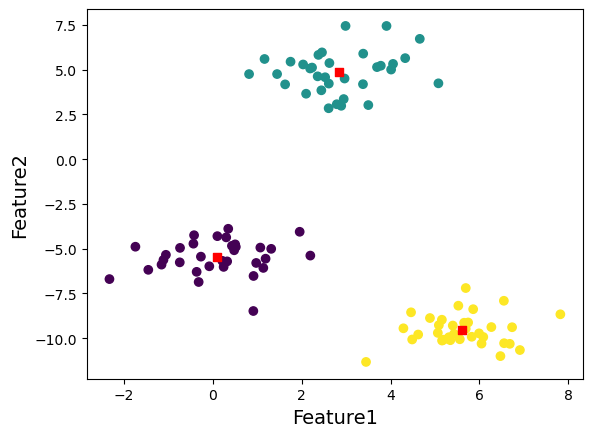

In [42]:
plt.scatter(X[:,0],X[:,1], c = labels.astype(float))
plt.xlabel('Feature1', fontsize=14)
plt.ylabel('Feature2', fontsize=14)
# draw centers 
plt.scatter(centers[:,0],  centers[:,1], c="red", marker="s")
plt.show()

In [27]:
print(kmeans.transform(X[:10]))   # Show distance between centroids and points
print(labels[:10])

[[ 2.7119914  12.66012274  8.43671672]
 [ 0.70847346 10.03168954  6.89609041]
 [ 9.60385746  1.08714957 13.76077949]
 [ 7.26589392 15.07961458  0.43307887]
 [10.92857897  0.91556546 15.25996233]
 [10.19866225  0.8597614  13.91296253]
 [ 7.67696883 15.4989238   0.87480072]
 [ 1.31820101  9.67363774  8.03107398]
 [11.30473097  1.00752823 14.8774384 ]
 [ 5.86590741 12.39107446  2.34406396]]
[0 0 1 2 1 1 2 0 1 2]


In [28]:
kmeans.inertia_

186.3658862010144

In [43]:
kmeans.n_iter_

2

In [30]:
kmeans.score(X)

-186.36588620101446

## Elbow Technique
#### A graphical method for finding the optimal K value in a k-means clustering algorithm

In [31]:
cost = []
for k in range(2,6):
   kmeans = KMeans(n_clusters=k, n_init=1)
   kmeans.fit(X)
   cost.append(kmeans.inertia_)   

Text(0, 0.5, 'Inertia (Cost)')

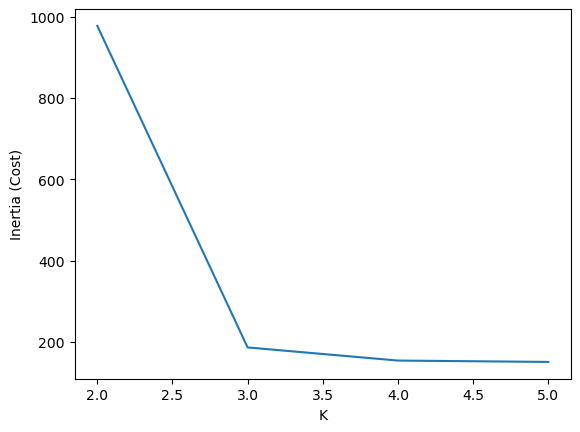

In [32]:
plt.plot(range(2,6), cost)
plt.xlabel("K")
plt.ylabel("Inertia (Cost)")